In [1]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Load processed data and trained model

In [2]:
X = pd.read_csv("../data/processed_features.csv")
y = pd.read_csv("../data/processed_target.csv").values.ravel()
model = joblib.load("../models/lgbm_model.pkl")

Predict class labels and probabilities

In [3]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

Print precision, recall, f1-score for each class

In [4]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       1.00      1.00      1.00      8213

    accuracy                           1.00   6362620
   macro avg       1.00      1.00      1.00   6362620
weighted avg       1.00      1.00      1.00   6362620



Plot confusion matrix to visualize correct vs incorrect predictions

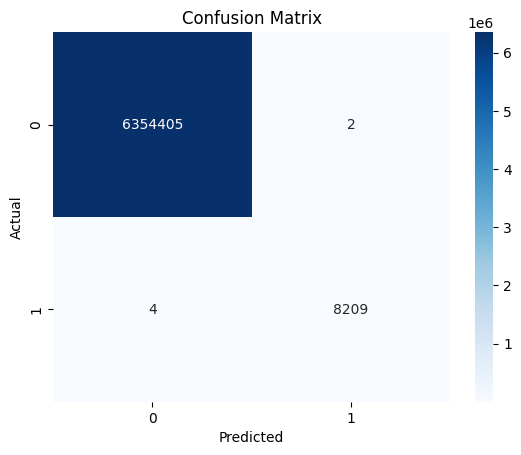

In [5]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plot ROC curve to evaluate classification threshold performance

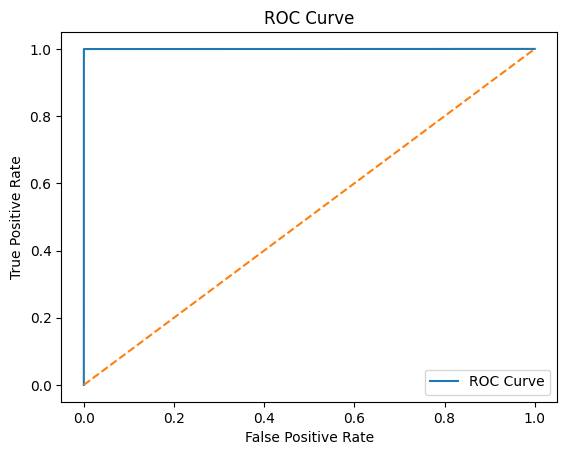

In [6]:
fpr, tpr, _ = roc_curve(y, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Area Under Curve (AUC) score

In [7]:
print("AUC Score:", roc_auc_score(y, y_proba))

AUC Score: 0.9998450670245497
